In [1]:
import numpy as np
import gstlearn as gl
import gstlearn.plot as gp
import matplotlib.pyplot as plt

This file provides some illustration of the generation of sets of Points.
We can create the set of Points which covers a Box (in any space dimension). 
For sake of demonstration, this is demonstrated in 2-D.

We can create the set by drawing samples at random within the Box extension

The number of samples = 1000


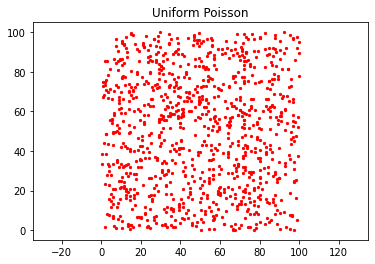

In [2]:
nech = 1000
db = gl.Db.createFromBox(nech,[0,0],[100,100],4324);
gp.point(db,size=5,title="Uniform Poisson")
plt.axis("equal") 
print("The number of samples =",db.getSampleNumber())

We now generate a positive Regionalized variable over a grid that will serve as a density.

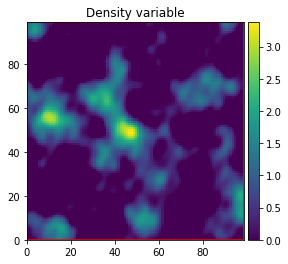

In [3]:
# Creating a Grid
grid = gl.DbGrid.create(nx=[100,100])

# Creating the isotropic Model
m = gl.Model()
cov = gl.CovAniso.createIsotropic(ctxt=m.getContext(),type=gl.ECov.BESSEL_K,range=20,param=2)
m.addCov(cov)

# Simulating a Gaussian variable using an isotropic Model then turn positive (exponentiation)
gl.simtub(None,grid,m,nbtuba=400)
a = grid["Simu"]
a[np.where(a < 0)[0]] = 0
grid["Simu"] = a
gp.plot(grid,title="Density variable")

Now we define the set of Points according to different models. The first one is according to Poisson process (i.e. points randomly located within a Box.

Repulsion = 0
 Range = 0.000000
 Beta = 0.000000
 Number of samples = 1000


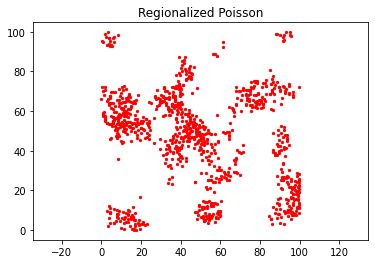

In [4]:
db = gl.Db.createFromDbGrid(nech,grid,4324)
gp.point(db,size=5,title="Regionalized Poisson")
plt.axis("equal") 
print("Number of samples =",db.getSampleNumber())

We now try the repulsion on the Uniform Poisson

The number of samples = 200


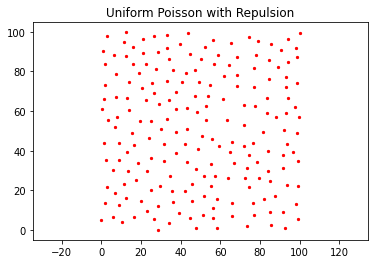

In [11]:
db = gl.Db.createFromBox(nech,[0,0],[100,100],seed=43243,flag_exact=True,flag_repulsion=True,range=5.,beta=100);
gp.point(db,size=5,title="Uniform Poisson with Repulsion")
plt.axis("equal") 
print("The number of samples =",db.getSampleNumber())

Combining the repulsion with the regionalized Poisson internsity

Repulsion = 1
 Range = 5.000000
 Beta = 100.000000
 Number of samples = 107


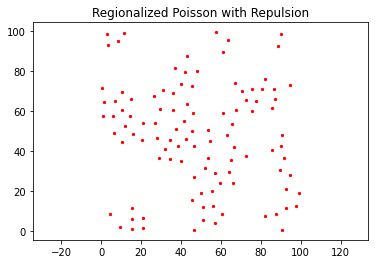

In [9]:
db = gl.Db.createFromDbGrid(nech,grid,seed=43243,flag_exact=True,flag_repulsion=True,range=5.,beta=100)
gp.point(db,size=5,title="Regionalized Poisson with Repulsion")
plt.axis("equal") 
print("Number of samples =",db.getSampleNumber())